In [1]:
pip install opencv-python

     |████████████████████████████████| 40.3 MB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#conda install pytorch torchvision cudatoolkit=10.2 -c pytorch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - cudatoolkit=10.2

Current channels:

  - https://conda.anaconda.org/pytorch/osx-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c pytorch torchvision

Solving environment: done

## Package Plan ##

  environment location: /Users/dugongzzz/opt/anaconda3

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ffmpeg-4.3                 |       h0a44026_0        10.1 MB  pytorch
    gnutls-3.6.5               |    h91ad68e_1002         1.6 MB
    lame-3.100                 |       h1de35cc_0         316 KB
    libuv-1.40.0               |       haf1e3a3_0         334 KB
    nettle-3.4.1               |       h3018a27_0         604 KB
    ninja-1.10.2               |   py37hf7b0b51_0         101 KB
    openh264-2.1.0             |       hd9629dc_0         635 KB
    pytorch-1.8.0              |          py3.7_0        71.8 MB  pytorch
    torchvision-0.9.0          |         py37_cpu         6.8 MB  pytorch
    ------------------------------------------------------------
                               

In [3]:
pip install keras==2.1.5

     |████████████████████████████████| 334 kB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9 MB 3.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/dugongzzz/opt/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    coverage-5.5               |   py37h9ed2024_2         256 KB
    grpcio-1.36.1              |   py37h97de6d8_1         1.6 MB
    markdown-3.3.4             |   py37hecd8cb5_0         127 KB
    tensorflow-2.0.0           |mkl_py37hda344b4_0           4 KB
    termcolor-1.1.0            |   py37hecd8cb5_1           9 KB
    ------------------------------------------------------------
                                           Total:         2.

In [9]:
import os
import pandas as pd
from glob import glob
import cv2
import matplotlib.pylab as plt
from facenet_pytorch import MTCNN
from PIL import Image
import os
import tarfile
import urllib
import urllib.request
import torch
from torch.utils.data import DataLoader

In [3]:
# Determine if an nvidia GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [4]:
# download zipped file from github. This should be pointed to LFS later.
url = "https://github.com/AT100/cmpt733-deepfake-detection/blob/main/dataset/deepfake-detection-challenge.zip?raw=true"
filename, headers = urllib.request.urlretrieve(url, filename="deepfake-detection-challenge.zip")
print("Download done!")

Download done!


In [5]:
from zipfile import ZipFile

with ZipFile('deepfake-detection-challenge.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [6]:
# change directory accordingly
CURR_DIR = os.getcwd()
print(CURR_DIR)
INPUT_DIR = CURR_DIR + "/deepfake-detection-challenge/train_sample_videos"

/Users/dugongzzz/Documents/GitHub/cmpt733-deepfake-detection


In [7]:
videopaths = sorted(glob(os.path.join(INPUT_DIR, "*.mp4")))
print("Number of videos:", len(videopaths))

Number of videos: 18


We want to read the json file to separate real and fake videos

In [33]:
meta = INPUT_DIR + '/metadata.json'
label_df = pd.read_json(meta)
label_df = label_df.iloc[0]
#df = pd.DataFrame(label_df)
# df.reset_index(inplace=True)
# df = df.rename(columns = {'index':'vid name'})
labeling_dict = label_df.to_dict()
labeling_dict

{'aagfhgtpmv.mp4': 'FAKE',
 'aapnvogymq.mp4': 'FAKE',
 'abarnvbtwb.mp4': 'REAL',
 'abofeumbvv.mp4': 'FAKE',
 'abqwwspghj.mp4': 'FAKE',
 'acifjvzvpm.mp4': 'FAKE',
 'acqfdwsrhi.mp4': 'FAKE',
 'acxnxvbsxk.mp4': 'FAKE',
 'acxwigylke.mp4': 'FAKE',
 'aczrgyricp.mp4': 'FAKE',
 'adhsbajydo.mp4': 'FAKE',
 'adohikbdaz.mp4': 'FAKE',
 'adylbeequz.mp4': 'FAKE',
 'aelfnikyqj.mp4': 'REAL',
 'aelzhcnwgf.mp4': 'FAKE',
 'aettqgevhz.mp4': 'FAKE',
 'aevrfsexku.mp4': 'FAKE',
 'afoovlsmtx.mp4': 'REAL',
 'agdkmztvby.mp4': 'FAKE',
 'agqphdxmwt.mp4': 'FAKE',
 'agrmhtjdlk.mp4': 'REAL',
 'ahbweevwpv.mp4': 'FAKE',
 'ahdbuwqxit.mp4': 'FAKE',
 'ahfazfbntc.mp4': 'FAKE',
 'ahqqqilsxt.mp4': 'REAL',
 'aipfdnwpoo.mp4': 'FAKE',
 'ajqslcypsw.mp4': 'REAL',
 'ajwpjhrbcv.mp4': 'FAKE',
 'aklqzsddfl.mp4': 'FAKE',
 'aknbdpmgua.mp4': 'FAKE',
 'aknmpoonls.mp4': 'FAKE',
 'akvmwkdyuv.mp4': 'FAKE',
 'akxoopqjqz.mp4': 'FAKE',
 'akzbnazxtz.mp4': 'FAKE',
 'aladcziidp.mp4': 'FAKE',
 'alaijyygdv.mp4': 'FAKE',
 'alninxcyhg.mp4': 'FAKE',
 

FAKE


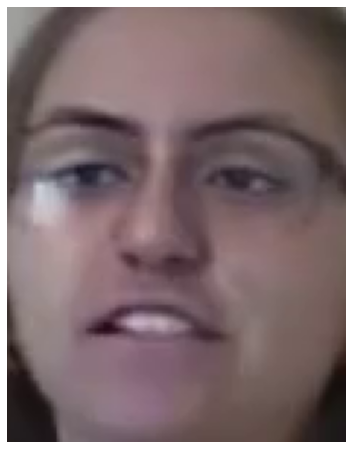

In [44]:
i = 10
num = str(i)

name = os.path.basename(videopaths[i])
print(labeling_dict[name])

v_cap = cv2.VideoCapture(videopaths[i])
_, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
new_frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(new_frame)
plt.axis('off')

mtcnn = MTCNN(select_largest=False, keep_all=True, post_process=False)#select_largest=False, device='cuda')
test = mtcnn(new_frame)

# detect faces in the image
faces = mtcnn.detect(new_frame)

if test is None:
    print("Unable to identify face")
else:   
    for each in faces[0]:
        if labeling_dict[name] == 'FAKE':
            each1 = each.tolist()
            x, y, w, h  = each1
            detected_face = frame[int(y):int(h), int(x):int(w)]
            plt.imshow(detected_face)
            savepath = CURR_DIR + '/dataset/test_images/fake/img' + num + '.jpg'
            plt.imsave(savepath, detected_face)
        else:
            each1 = each.tolist()
            x, y, w, h  = each1
            detected_face = frame[int(y):int(h), int(x):int(w)]
            plt.imshow(detected_face)
            savepath = CURR_DIR + '/dataset/test_images/real/img' + num + '.jpg'
            plt.imsave(savepath, detected_face)

(-0.5, 159.5, 159.5, -0.5)

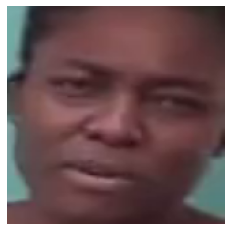

In [147]:
# there can be a few faces identified, so this will need to be adjusted
# plt.imshow(face.squeeze().permute(1,2,0).int().numpy())
# plt.axis('off')